In [1]:
import tensorflow as tf
print(tf.__version__)


2.19.0


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the base path
dataset_path = "C:/Users/hp/Documents/copy proj ml"

# Create ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

# Load the datasets
train_generator = train_datagen.flow_from_directory(
    directory=f"{dataset_path}/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    directory=f"{dataset_path}/valid",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    directory=f"{dataset_path}/test",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.
Found 33 images belonging to 33 classes.


In [4]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Dataset path
dataset_path = r"C:\Users\hp\Documents\copy proj ml"

# Image preprocessing with rescaling
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    directory=os.path.join(dataset_path, "train"),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    directory=os.path.join(dataset_path, "valid"),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    directory=os.path.join(dataset_path, "test"),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.
Found 33 images belonging to 33 classes.


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),

    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(38, activation='softmax')
])

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,254,438 (84.89 MB)

 Trainable params: 22,254,438 (84.89 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)



In [18]:
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10  # You can increase this later
)


E:\aaaaaanaconda\envs\plant-env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3180s 1s/step - accuracy: 0.3993 - loss: 2.1422 - val_accuracy: 0.8399 - val_loss: 0.5241
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2475s 1s/step - accuracy: 0.7727 - loss: 0.7226 - val_accuracy: 0.8879 - val_loss: 0.3520
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2579s 1s/step - accuracy: 0.8385 - loss: 0.5062 - val_accuracy: 0.9030 - val_loss: 0.3056
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2588s 1s/step - accuracy: 0.8779 - loss: 0.3782 - val_accuracy: 0.9228 - val_loss: 0.2396
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2427s 1s/step - accuracy: 0.8965 - loss: 0.3146 - val_accuracy: 0.9300 - val_loss: 0.2228
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2271s 1s/step - accuracy: 0.9164 - loss: 0.2605 - val_accuracy: 0.9390 - val_loss: 0.1890
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2356s 1s/step - accuracy: 0.9305 - loss: 0.2135 - val_accuracy: 0.9336 - val_loss: 0.2139
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2513s 1s/step - accuracy: 0.9398 -

In [15]:
pip install Pillow


Note: you may need to restart the kernel to use updated packages.


In [20]:
model.save('plant_disease_model.keras')  # ✅ Recommended by Keras


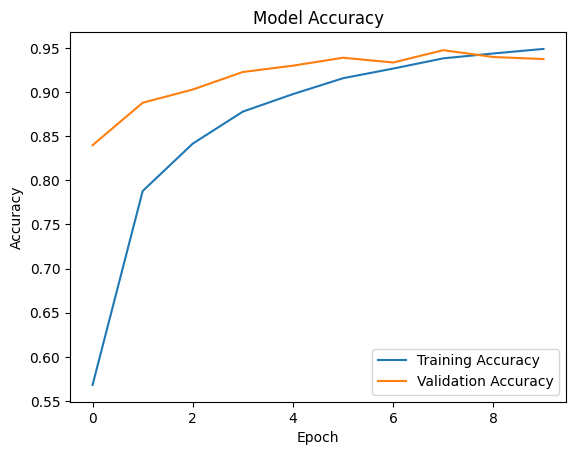

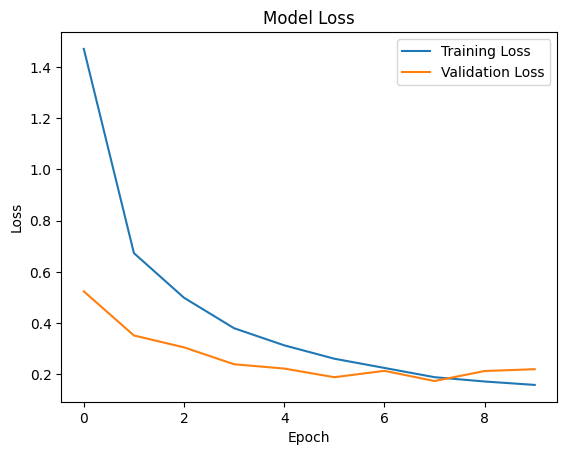

In [23]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [22]:
!pip install matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 2.8 MB/s eta 0:00:03
   ----- ---------------------------------- 1.0/8.1 MB 2.8 MB/s eta 0:00:03
   --------- ------------------------------ 1.8/8.1 MB 2.9 MB/s eta 0:00:03
   ----------- ---------------------------- 2.4/8.1 MB 2.9 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/8.1 MB 2.9 MB/s eta 0:00:02
   ------------------ --------------------- 3.7/8.1 MB 2.9 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.1 MB 3.0 MB/s eta 0:00:02
   ------------------------ --------------- 5.0/8.1 MB 3.0 MB/s eta 0:00:02
   --------------------------- ------------ 5.5/8.1 MB 3.0 MB/s eta 0:00:01
   ------------------------------- -------- 6.3/8.1 MB 3.0 MB/s eta 0:00:01
   --------------------------------- ----

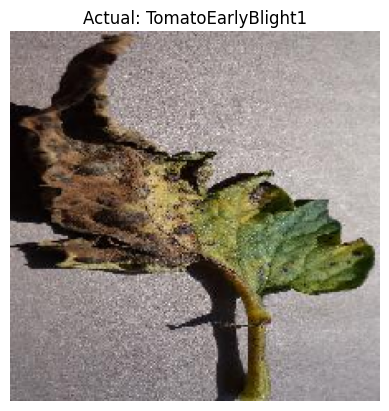

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
✅ Predicted: TomatoYellowCurlVirus3
🎯 Actual: TomatoEarlyBlight1


In [25]:
import os
import random
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Set the base path to your test dataset
base_path = r"C:\Users\hp\Documents\copy proj ml\test"

# Get list of class folders (e.g., Apple___Apple_scab, etc.)
class_names = os.listdir(base_path)

# Randomly pick a class folder
random_class = random.choice(class_names)
class_path = os.path.join(base_path, random_class)

# Pick a random image from the chosen class
random_image = random.choice(os.listdir(class_path))
image_path = os.path.join(class_path, random_image)

# Load and preprocess the image
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Show the image
plt.imshow(img)
plt.title(f"Actual: {random_class}")
plt.axis('off')
plt.show()

# Make prediction
prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]

print(f"✅ Predicted: {predicted_class}")
print(f"🎯 Actual: {random_class}")


In [30]:
import os
import numpy as np
from keras.preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Path to your test dataset
base_path = r"C:\Users\hp\Documents\copy proj ml\test"

# Get sorted class folder names (keep consistent order)
class_names = sorted(os.listdir(base_path))
print("Classes:", class_names)

# Function to load and preprocess image
def load_and_preprocess(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    return img_array

# Prepare lists to store ground truth and predictions
y_true = []
y_pred = []

# Iterate over each class folder
for idx, class_name in enumerate(class_names):
    class_folder = os.path.join(base_path, class_name)
    image_files = os.listdir(class_folder)
    for img_file in image_files:
        img_path = os.path.join(class_folder, img_file)
        img_array = load_and_preprocess(img_path)
        
        # Predict
        prediction = model.predict(img_array)
        pred_idx = np.argmax(prediction)
        
        # Store results
        y_true.append(idx)
        y_pred.append(pred_idx)

# Calculate accuracy
accuracy = np.mean(np.array(y_true) == np.array(y_pred))
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Classes: ['AppleScrab1', 'AppleScrab2', 'AppleScrab3', 'CornCommanRust2', 'CornCommanRust3', 'CornCommonRust1', 'PotatoEarlyBlight1', 'PotatoEarlyBlight2', 'PotatoEarlyBlight3', 'PotatoEarlyBlight4', 'PotatoEarlyBlight5', 'PotatoHealthy1', 'PotatoHealthy2', 'TomatoEarlyBlight 2', 'TomatoEarlyBlight 3', 'TomatoEarlyBlight 4', 'TomatoEarlyBlight 5', 'TomatoEarlyBlight 6', 'TomatoEarlyBlight1', 'TomatoHealthy1', 'TomatoHealthy2', 'TomatoHealthy3', 'TomatoHealthy4', 'TomatoYellowCurlVirus1', 'TomatoYellowCurlVirus2', 'TomatoYellowCurlVirus3', 'TomatoYellowCurlVirus4', 'TomatoYellowCurlVirus5', 'TomatoYellowCurlVirus6', 'appleCedarRust1', 'appleCedarRust2', 'appleCedarRust3', 'appleCedarRust4']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

ValueError: Number of classes, 35, does not match size of target_names, 33. Try specifying the labels parameter

In [27]:
!pip install scikit-learn


  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 5.6 MB/s eta 0:00:02
   ----- ---------------------------------- 1.6/11.1 MB 4.9 MB/s eta 0:00:02
   --------- ------------------------------ 2.6/11.1 MB 5.0 MB/s eta 0:00:02
   --------------- ------------------------ 4.2/11.1 MB 5.5 MB/s eta 0:00:02
   -------------------- ------------------- 5.8/11.1 MB 6.0 MB/s eta 0:00:01
   -------------------------- ------------- 7.3/11.1 MB 6.3 MB/s eta 0:00:01
   -------------------------------- ------- 9.2/11.1 MB 6.6 MB/s eta 0:00:01
   -------------------------------------- - 10.7/11.1 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 6.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.2 MB ? eta -:--:--
   - ----------------------------

In [29]:
!pip install seaborn


   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
    --------------------------------------- 0.3/11.6 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.6 MB 2.6 MB/s eta 0:00:04
   ----- ---------------------------------- 1.6/11.6 MB 2.8 MB/s eta 0:00:04
   -------- ------------------------------- 2.4/11.6 MB 2.9 MB/s eta 0:00:04
   ---------- ----------------------------- 3.1/11.6 MB 3.3 MB/s eta 0:00:03
   -------------- ------------------------- 4.2/11.6 MB 3.5 MB/s eta 0:00:03
   ------------------ --------------------- 5.2/11.6 MB 3.8 MB/s eta 0:00:02
   --------------------- ------------------ 6.3/11.6 MB 4.0 MB/s eta 0:00:02
   --------------------------- ------------ 7.9/11.6 MB 4.4 MB/s eta 0:00:01
   ------------------------------- -------- 9.2/11.6 MB 4.6 MB/s eta 0:00:01
   ------------------------------------- -- 11.0/11.6 MB 4.9 MB/s eta 0:00:01
   ---------------------------------------  11.5/11.6 MB 5.0 MB/s eta 0:00:01
   --------

In [31]:
print("Model output classes:", model.output_shape[-1])


Model output classes: 38


In [32]:
print("Number of test folders:", len(class_names))


Number of test folders: 33


In [33]:
# All 38 classes your model predicts (from training)
all_classes = [
    'AppleScrab1', 'AppleScrab2', 'AppleScrab3', 'CornCommanRust2', 'CornCommanRust3',
    'CornCommonRust1', 'PotatoEarlyBlight1', 'PotatoEarlyBlight2', 'PotatoEarlyBlight3',
    'PotatoEarlyBlight4', 'PotatoEarlyBlight5', 'PotatoHealthy1', 'PotatoHealthy2',
    'TomatoEarlyBlight 2', 'TomatoEarlyBlight 3', 'TomatoEarlyBlight 4', 'TomatoEarlyBlight 5',
    'TomatoEarlyBlight 6', 'TomatoEarlyBlight1', 'TomatoHealthy1', 'TomatoHealthy2', 'TomatoHealthy3',
    'TomatoHealthy4', 'TomatoYellowCurlVirus1', 'TomatoYellowCurlVirus2', 'TomatoYellowCurlVirus3',
    'TomatoYellowCurlVirus4', 'TomatoYellowCurlVirus5', 'TomatoYellowCurlVirus6', 'appleCedarRust1',
    'appleCedarRust2', 'appleCedarRust3', 'appleCedarRust4'
]

# Your test folder classes (33 classes) — read from folder
import os
test_base_path = r"C:\Users\hp\Documents\copy proj ml\test"
test_classes = os.listdir(test_base_path)
test_classes.sort()  # just to keep order consistent


In [34]:
test_class_indices = [all_classes.index(cls) for cls in test_classes]


In [35]:
from keras.preprocessing import image
import numpy as np
import os

y_true = []
y_pred = []

test_base_path = r"C:\Users\hp\Documents\copy proj ml\test"
test_classes = os.listdir(test_base_path)
test_classes.sort()

all_classes = [
    'AppleScrab1', 'AppleScrab2', 'AppleScrab3', 'CornCommanRust2', 'CornCommanRust3',
    'CornCommonRust1', 'PotatoEarlyBlight1', 'PotatoEarlyBlight2', 'PotatoEarlyBlight3',
    'PotatoEarlyBlight4', 'PotatoEarlyBlight5', 'PotatoHealthy1', 'PotatoHealthy2',
    'TomatoEarlyBlight 2', 'TomatoEarlyBlight 3', 'TomatoEarlyBlight 4', 'TomatoEarlyBlight 5',
    'TomatoEarlyBlight 6', 'TomatoEarlyBlight1', 'TomatoHealthy1', 'TomatoHealthy2', 'TomatoHealthy3',
    'TomatoHealthy4', 'TomatoYellowCurlVirus1', 'TomatoYellowCurlVirus2', 'TomatoYellowCurlVirus3',
    'TomatoYellowCurlVirus4', 'TomatoYellowCurlVirus5', 'TomatoYellowCurlVirus6', 'appleCedarRust1',
    'appleCedarRust2', 'appleCedarRust3', 'appleCedarRust4'
]

for class_name in test_classes:
    class_folder = os.path.join(test_base_path, class_name)
    img_files = os.listdir(class_folder)
    print(f"Processing class '{class_name}' with {len(img_files)} images")

    for img_file in img_files:
        img_path = os.path.join(class_folder, img_file)
        
        # Load and preprocess image
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0

        # Predict with your model (make sure model is loaded)
        prediction = model.predict(img_array)
        predicted_index = np.argmax(prediction)

        # Get true index from all_classes
        true_index = all_classes.index(class_name)

        y_true.append(true_index)
        y_pred.append(predicted_index)

print("Prediction loop done.")
print(f"Total test samples processed: {len(y_true)}")


Processing class 'AppleScrab1' with 1 images
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Processing class 'AppleScrab2' with 1 images
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Processing class 'AppleScrab3' with 1 images
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Processing class 'CornCommanRust2' with 1 images
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
Processing class 'CornCommanRust3' with 1 images
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Processing class 'CornCommonRust1' with 1 images
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Processing class 'PotatoEarlyBlight1' with 1 images
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
Processing class 'PotatoEarlyBlight2' with 1 images
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Processing class 'PotatoEarlyBlight3' with 1 images
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Processing class 'PotatoEarlyBlight4' with 1 images
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Processing class 'PotatoEarlyBlight5' with 1 images
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
Processing class 'PotatoHealt

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Make sure y_true and y_pred are ready from previous step

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_classes))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=test_classes, yticklabels=test_classes, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Classification Report:


ValueError: Number of classes, 35, does not match size of target_names, 33. Try specifying the labels parameter

In [37]:
print("Unique classes in y_true:", np.unique(y_true))
print("Unique classes in y_pred:", np.unique(y_pred))
print("Length of test_classes (target_names):", len(test_classes))
print("test_classes:", test_classes)


Unique classes in y_true: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32]
Unique classes in y_pred: [ 0  2  8 15 20 22 24 29 35 37]
Length of test_classes (target_names): 33
test_classes: ['AppleScrab1', 'AppleScrab2', 'AppleScrab3', 'CornCommanRust2', 'CornCommanRust3', 'CornCommonRust1', 'PotatoEarlyBlight1', 'PotatoEarlyBlight2', 'PotatoEarlyBlight3', 'PotatoEarlyBlight4', 'PotatoEarlyBlight5', 'PotatoHealthy1', 'PotatoHealthy2', 'TomatoEarlyBlight 2', 'TomatoEarlyBlight 3', 'TomatoEarlyBlight 4', 'TomatoEarlyBlight 5', 'TomatoEarlyBlight 6', 'TomatoEarlyBlight1', 'TomatoHealthy1', 'TomatoHealthy2', 'TomatoHealthy3', 'TomatoHealthy4', 'TomatoYellowCurlVirus1', 'TomatoYellowCurlVirus2', 'TomatoYellowCurlVirus3', 'TomatoYellowCurlVirus4', 'TomatoYellowCurlVirus5', 'TomatoYellowCurlVirus6', 'appleCedarRust1', 'appleCedarRust2', 'appleCedarRust3', 'appleCedarRust4']


In [38]:
valid_classes = set(range(len(test_classes)))  # {0, 1, 2, ..., 32}

# Filter only valid samples (both true and pred classes should be valid)
filtered_indices = [i for i in range(len(y_true)) if y_true[i] in valid_classes and y_pred[i] in valid_classes]

y_true_filtered = [y_true[i] for i in filtered_indices]
y_pred_filtered = [y_pred[i] for i in filtered_indices]


In [39]:
print(classification_report(y_true_filtered, y_pred_filtered, target_names=test_classes))


ValueError: Number of classes, 25, does not match size of target_names, 33. Try specifying the labels parameter

In [40]:
import numpy as np

unique_classes_filtered = np.unique(y_true_filtered)
print("Unique classes after filtering:", unique_classes_filtered)
print("Number of unique classes:", len(unique_classes_filtered))


Unique classes after filtering: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 29 30 31 32]
Number of unique classes: 22


In [41]:
test_classes_filtered = [test_classes[i] for i in unique_classes_filtered]
print("Filtered class names:", test_classes_filtered)


Filtered class names: ['AppleScrab1', 'AppleScrab2', 'AppleScrab3', 'CornCommanRust2', 'CornCommanRust3', 'CornCommonRust1', 'PotatoEarlyBlight1', 'PotatoEarlyBlight2', 'PotatoEarlyBlight3', 'PotatoEarlyBlight4', 'PotatoEarlyBlight5', 'PotatoHealthy1', 'PotatoHealthy2', 'TomatoEarlyBlight 2', 'TomatoEarlyBlight 4', 'TomatoEarlyBlight 5', 'TomatoEarlyBlight 6', 'TomatoEarlyBlight1', 'appleCedarRust1', 'appleCedarRust2', 'appleCedarRust3', 'appleCedarRust4']


In [4]:
from sklearn.metrics import classification_report

print(classification_report(
    y_true_filtered,
    y_pred_filtered,
    labels=unique_classes_filtered,
    target_names=test_classes_filtered
))


NameError: name 'y_true_filtered' is not defined

In [ ]:
print(classification_report(
    y_true_filtered,
    y_pred_filtered,
    labels=unique_classes_filtered,
    target_names=test_classes_filtered
))


In [47]:
from IPython.display import display
import ipywidgets as widgets
from PIL import Image
import numpy as np

# Replace these with your actual model and classes
# model = your_loaded_model
# test_classes = your_class_names_list

upload = widgets.FileUpload(accept='image/*', multiple=False)
display(upload)

def preprocess_image(image_bytes):
    img = Image.open(image_bytes).convert('RGB')
    img = img.resize((224, 224))  # Change size to your model's input size
    img_array = np.array(img) / 255.0  # Normalize if your model expects it
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

def on_upload_change(change):
    for filename, fileinfo in upload.value.items():
        image_bytes = fileinfo['content']
        img_array = preprocess_image(io.BytesIO(image_bytes))
        prediction = model.predict(img_array)
        predicted_class_idx = np.argmax(prediction)
        print(f"Predicted class: {test_classes[predicted_class_idx]}")

upload.observe(on_upload_change, names='value')


FileUpload(value=(), accept='image/*', description='Upload')

In [46]:
!pip install ipywidgets


  Using cached ipywidgets-8.1.7-py3-none-any.whl.metadata (2.4 kB)
  Using cached widgetsnbextension-4.0.14-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.15-py3-none-any.whl.metadata (20 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   -------------- ------------------------- 0.8/2.2 MB 2.2 MB/s eta 0:00:01
   ----------------------- ---------------- 1.3/2.2 MB 2.5 MB/s eta 0:00:01
   -------------------------------------- - 2.1/2.2 MB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 2.7 MB/s eta 0:00:00

   ---------------------------------------- 0/3 [widgetsnbextension]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -----------------------

In [48]:
from IPython.display import display
import ipywidgets as widgets

# Create file upload widget
upload = widgets.FileUpload(accept='image/*', multiple=False)
display(upload)


FileUpload(value=(), accept='image/*', description='Upload')

In [49]:
import os

# List all files in current working directory
for file in os.listdir():
    if file.endswith(".h5"):
        print(file)


plant_disease_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
✅ Predicted Disease: Tomato___Early_blight


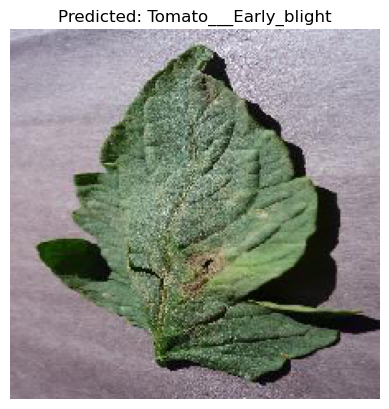

In [6]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load model
model = load_model('plant_disease_model.h5')

# Define class labels
class_labels = [
    'Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy',
    'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy',
    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight',
    'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
    'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy',
    'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy',
    'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy',
    'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'
]

# Load and preprocess image
img_path = r'C:\Users\hp\Music\Desktop\pd\tom.jpg'  # Update this path as needed
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize

# Predict
prediction = model.predict(img_array)
predicted_index = np.argmax(prediction)

# Show result
if predicted_index < len(class_labels):
    predicted_class = class_labels[predicted_index]
    print(f"✅ Predicted Disease: {predicted_class}")
else:
    print("❌ Prediction index out of range!")

# Show the image
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {predicted_class}")
plt.show()


In [54]:
print("Prediction shape:", prediction.shape)
print("Prediction values:", prediction)


Prediction shape: (1, 38)
Prediction values: [[4.05719247e-21 2.30635134e-16 3.46820256e-25 3.59921764e-23
  2.02197935e-20 6.05326068e-26 2.94588596e-17 7.63301144e-31
  2.85853542e-37 0.00000000e+00 5.16095472e-30 8.15797123e-31
  7.44872665e-28 3.11387886e-22 5.36256600e-18 1.04404116e-23
  3.42433612e-31 1.63074441e-24 2.45328767e-19 1.82984322e-10
  1.15673317e-23 4.31069170e-15 9.99985337e-01 1.47007158e-05
  3.19033493e-12 7.73096506e-26 3.32787261e-28 3.47049917e-10
  7.53197418e-32 9.53984481e-25 1.04125463e-20 1.06650489e-27
  7.66212875e-15 1.66440423e-18 1.40591247e-13 2.34065406e-22
  8.18239255e-19 8.47662551e-27]]


In [55]:
import os

train_dir = "C:/Users/hp/Documents/copy proj ml/train"
class_labels = sorted(os.listdir(train_dir))
print("Number of classes:", len(class_labels))
print("Class labels:", class_labels)


Number of classes: 38
Class labels: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spott

In [63]:
model.save('plant_disease_model.keras')


In [5]:
print("hi")

hi


In [11]:
# Assuming 'model' is your trained Keras model

model.save('plant_disease_model.keras')  # Saves model in Keras HDF5 format
print("Model saved successfully.")


Model saved successfully.
